# Practica 3 
## Carmona Serrano Ian Carlo

Importamos Librerias 

In [93]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.metrics import edit_distance
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('./datasets/sentiment_analysis_dataset.csv')
stop_words = set(stopwords.words('spanish'))

In [95]:
# Función para limpiar el texto
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|@[^\s]+|[^a-zA-Z\s]", "", text)
    return text

In [96]:
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 3]
    return ' '.join(lemmatized_tokens)

In [97]:
# Aplicar limpieza y lematización al texto de los tweets
df['clean_text'] = df['text'].apply(clean_text)
df['preprocessed_text'] = df['clean_text'].apply(preprocess_text)

# Guardar el conjunto de datos preprocesado
df.to_csv('dataset_preprocesado.csv', index=False)

In [98]:
# Definir grupos de sentimientos
sentimientos_positivos = {'joyful', 'peaceful', 'powerful'}
sentimientos_neutros = {'mad'}
sentimientos_negativos = {'sad', 'scared'}

def asignar_nuevo_sentimiento(sentiment):
    if sentiment in sentimientos_positivos:
        return 'positivo'
    elif sentiment in sentimientos_neutros:
        return 'neutro'
    elif sentiment in sentimientos_negativos:
        return 'negativo'
    else:
        return None  # Si no coincide con ningún sentimiento, retornar None

# Aplicar la función a cada fila del DataFrame
df['nuevosentimiento'] = df['sentiment'].apply(asignar_nuevo_sentimiento)

# Inicializar conjuntos para almacenar las palabras únicas de cada sentimiento
palabras_positivas = set()
palabras_neutras = set()
palabras_negativas = set()

# Agrupar el conjunto de datos por sentimiento
grupos_sentimiento = df.groupby('sentiment')

# Iterar sobre cada grupo de datos
for sentimiento, grupo in grupos_sentimiento:
    # Concatenar todos los textos preprocesados para el sentimiento actual
    textos = ' '.join(grupo['preprocessed_text'])
    
    # Tokenizar los textos y contar la frecuencia de cada palabra
    contador_palabras = Counter(textos.split())
    
    # Filtrar las palabras que ya han sido vistas en otros sentimientos
    for palabra, frecuencia in contador_palabras.most_common(50):
        if sentimiento in sentimientos_positivos:
            palabras_positivas.add(palabra)
        elif sentimiento in sentimientos_neutros:
            palabras_neutras.add(palabra)
        elif sentimiento in sentimientos_negativos:
            palabras_negativas.add(palabra)

# Mostrar las primeras 50 palabras únicas de cada sentimiento
print("Sentimientos positivos:")
print(", ".join(list(palabras_positivas)[:50]))
print("\n")

print("Sentimientos neutros:")
print(", ".join(list(palabras_neutras)[:50]))
print("\n")

print("Sentimientos negativos:")
print(", ".join(list(palabras_negativas)[:50]))
print("\n")


Sentimientos positivos:
casa, feliz, cumplido, despreocupado, cuenta, puedo, atrevido, juerguista, victorioso, responder, animado, rpido, indiferente, querer, toda, seguridad, gracioso, solo, entender, tener, ahora, gran, cambio, impactado, brillante, gracias, verdad, desvergonzado, firmeza, gente, miedo, reconocido, siento, intrpido, trabajo, tiempo, vida, seguro, logrado, quiero, motivado, valiente, odia, autoconfianza, siempre, debe, calmado, cosas, apacible, suave


Sentimientos neutros:
jugar, decir, envidioso, gracias, furioso, competitivo, verdad, granhermano, desilusionado, contrariado, gente, sido, hace, apartado, puedo, pasin, mejor, siento, inseguro, mismo, despus, idea, vida, compulsivo, rpido, quiero, madre, celoso, persona, nunca, mundo, toda, sentir, amor, hacer, siempre, dice, solo, nadie, ando, frustrado, tener, ahora, bien, buenos, cosas, corazn, creo, sueo, molesto


Sentimientos negativos:
desconcertado, cuenta, incomodo, puedo, adormecido, luego, atolondrado, adorm

In [99]:
# palabras_clave = {
#     'negativo': ['triste', 'malo', 'horrible', 'terrible', 'desagradable', 'insatisfactorio', 'desalentador', 'decepcionante', 'frustrante', 'preocupante', 'desastroso', 'desafiante', 'abrumador', 'angustiante', 'desanimador', 'deprimente', 'desesperante', 'oscuro', 'pesimista', 'descorazonador', 'desafortunado', 'amargo', 'desesperanzador', 'agobiante', 'amargado', 'trágico', 'doloroso', 'lamentable', 'agobiante', 'desconsolador', 'desgarrador', 'abatido', 'desilusionante', 'desafortunado', 'angustioso', 'desalentador', 'desmoralizante', 'sombrío', 'funesto', 'lúgubre', 'melancólico', 'nefasto', 'trágico', 'desesperado', 'desalentador', 'destructivo', 'inquietante', 'difícil', 'penoso', 'miserable', 'devastador', 'difícil', 'problemático', 'grave', 'desconsolador', 'horroroso', 'pesado', 'perturbador', 'espantoso', 'fatídico', 'ruinoso', 'funesto', 'pesimista', 'desolador', 'desgarrador', 'dolorido', 'insoportable', 'lamentable', 'desastroso', 'desdichado', 'desesperanzador', 'tristeza', 'infausto', 'lastimoso', 'desfavorable', 'desgarrador'],
#     'neutro': ['normal', 'regular', 'común', 'ordinario', 'estándar', 'típico', 'estándar', 'regular', 'promedio', 'convencional', 'habitual', 'rutinario', 'común', 'corriente', 'normalizado', 'aceptable', 'equilibrado', 'indiferente', 'habitual', 'convencional', 'tradicional', 'estándar', 'corriente', 'rutinario', 'protocolario', 'generalizado', 'aceptable', 'equilibrado', 'moderado', 'mediano', 'comúnmente', 'promedio', 'ordinario', 'característico', 'básico', 'neutro', 'indiferente', 'normalizado', 'comúnmente', 'típicamente', 'establecido', 'regularmente', 'balanceado', 'medido', 'medio', 'pasajero', 'consistente', 'estable', 'estacionario', 'frecuente', 'normalmente', 'mayormente', 'generalmente', 'usualmente', 'formal', 'regularidad', 'inalterado', 'invariable', 'inamovible', 'estacionario', 'uniforme', 'invariante', 'inmutable', 'estancado', 'estandarizado', 'reglamentario', 'homogéneo', 'predecible'],
#     'positivo': ['feliz', 'bueno', 'excelente', 'maravilloso', 'agradable', 'satisfactorio', 'encantador', 'fantástico', 'grandioso', 'espléndido', 'gratificante', 'optimista', 'alentador', 'emocionante', 'alegre', 'positivo', 'radiante', 'glorioso', 'esperanzador', 'inspirador', 'alentador', 'edificante', 'vibrante', 'exultante', 'jubiloso', 'triunfante', 'encantador', 'encantador', 'fascinante', 'brillante', 'deslumbrante', 'exquisito', 'sublime', 'encantador', 'espectacular', 'asombroso', 'sensacional', 'impresionante', 'genial', 'inolvidable', 'magnífico', 'deslumbrante', 'desbordante', 'electrizante', 'maravilloso', 'fantástico', 'increíble', 'sensacional', 'sobresaliente', 'extraordinario', 'espléndido', 'deslumbrante', 'estupendo', 'atractivo', 'desbordante', 'alegre', 'jubiloso', 'radiante', 'optimista', 'luminoso', 'cautivador', 'triunfal', 'triunfante', 'inspirador', 'exaltante', 'motivador', 'alentador', 'uplifting', 'emocionante', 'animado', 'conmovedor', 'gratificante', 'hermoso', 'estimulante', 'estimulante', 'edificante']
# }


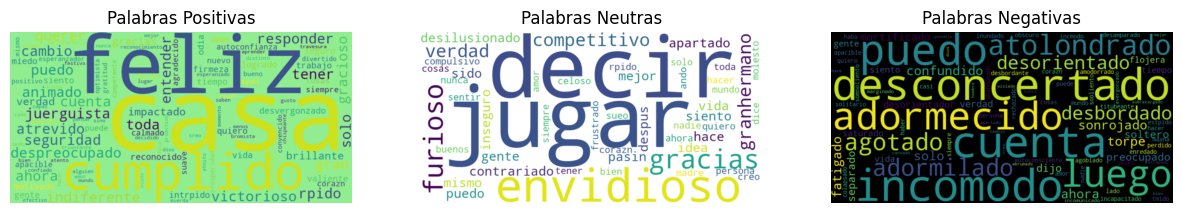

In [100]:
# Convertir las listas en cadenas de texto
textos_positivos = ' '.join(palabras_positivas)
textos_neutros = ' '.join(palabras_neutras)
textos_negativos = ' '.join(palabras_negativas)

# Crear nubes de palabras para cada categoría de sentimiento
wordcloud_positivos = WordCloud(width=800, height=400, background_color='lightgreen').generate(textos_positivos)
wordcloud_neutros = WordCloud(width=800, height=400, background_color='white').generate(textos_neutros)
wordcloud_negativos = WordCloud(width=800, height=400, background_color='black').generate(textos_negativos)

# Mostrar las nubes de palabras
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positivos, interpolation='bilinear')
plt.title('Palabras Positivas')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neutros, interpolation='bilinear')
plt.title('Palabras Neutras')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_negativos, interpolation='bilinear')
plt.title('Palabras Negativas')
plt.axis('off')

plt.show()

In [101]:
# Definir la función para contabilizar componentes sintácticos
def contabilizar_componentes_sintacticos(texto, palabras_clave_sentimiento):
    # Tokenizar el texto y etiquetar partes del discurso
    tokens = nltk.word_tokenize(texto)
    pos_tags = nltk.pos_tag(tokens)
    
    # Inicializar contadores para adjetivos, verbos y sustantivos
    adjetivos = 0
    verbos = 0
    sustantivos = 0
    
    # Contabilizar componentes sintácticos asociados con palabras clave del sentimiento
    for palabra, pos_tag in pos_tags:
        if palabra in palabras_clave_sentimiento:
            if pos_tag.startswith('JJ'):  # Adjetivo
                adjetivos += 1
            elif pos_tag.startswith('VB'):  # Verbo
                verbos += 1
            elif pos_tag.startswith('NN'):  # Sustantivo
                sustantivos += 1
    
    return adjetivos, verbos, sustantivos

# Palabras clave por sentimiento
palabras_clave_sentimientos = {
    'positivo': palabras_positivas,
    'neutro': palabras_neutras,
    'negativo': palabras_negativas
}

# Aplicar la función a cada texto y extraer los componentes sintácticos
for sentimiento, palabras_clave_sentimiento in palabras_clave_sentimientos.items():
    df[f'adjetivos_{sentimiento}'], df[f'verbos_{sentimiento}'], df[f'sustantivos_{sentimiento}'] = zip(*df['preprocessed_text'].apply(lambda x: contabilizar_componentes_sintacticos(x, palabras_clave_sentimiento)))

df.to_csv('dataset_preprocesado.csv', index=False)


In [103]:
df.head(5)

,user,text,date,emotion,sentiment,clean_text,preprocessed_text,nuevosentimiento,adjetivos_positivo,verbos_positivo,sustantivos_positivo,adjetivos_neutro,verbos_neutro,sustantivos_neutro,adjetivos_negativo,verbos_negativo,sustantivos_negativo
0,@erreborda,termine bien abrumado después de hoy,"Jan 6, 2024 · 2:53 AM UTC",overwhelmed,scared,termine bien abrumado despus de hoy,termine bien abrumado despus,negativo,0,0,1,0,0,2,0,0,2
1,@shpiderduck,me siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",overwhelmed,scared,me siento abrumado,siento abrumado,negativo,0,0,1,0,0,1,0,0,2
2,@Alex_R_art,Me siento un poco abrumado por la cantidad de ...,"Jan 6, 2024 · 12:20 AM UTC",overwhelmed,scared,Me siento un poco abrumado por la cantidad de ...,siento abrumado cantidad cosas quiero dibujar ...,negativo,0,0,3,0,0,4,0,0,4
3,@anggelinaa97,Salvador la única persona que no la ha abrumad...,"Jan 5, 2024 · 10:38 PM UTC",overwhelmed,scared,Salvador la nica persona que no la ha abrumado...,salvador nica persona abrumado versiones nadie...,negativo,0,0,1,0,0,1,0,0,2
4,@diegoreyesvqz,Denme un helado o algo que ando full abrumado.,"Jan 5, 2024 · 8:38 PM UTC",overwhelmed,scared,Denme un helado o algo que ando full abrumado,denme helado ando full abrumado,negativo,0,0,0,0,1,0,0,0,1
